# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading dataset

In [2]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.shape

(215, 15)

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df['salary'].fillna(0,inplace = True)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Properties and Visualization

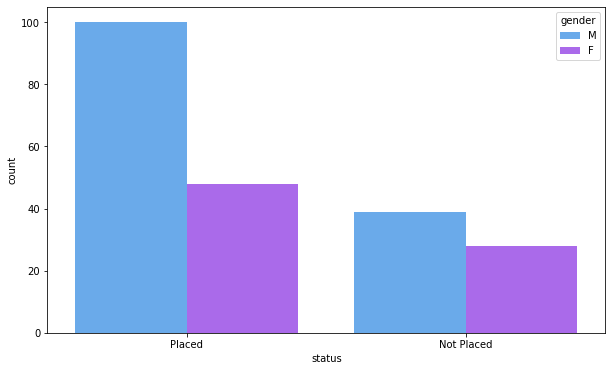

In [8]:
plt.subplots(figsize=(10,6))
sns.countplot(df['status'],hue= df['gender'],palette='cool')

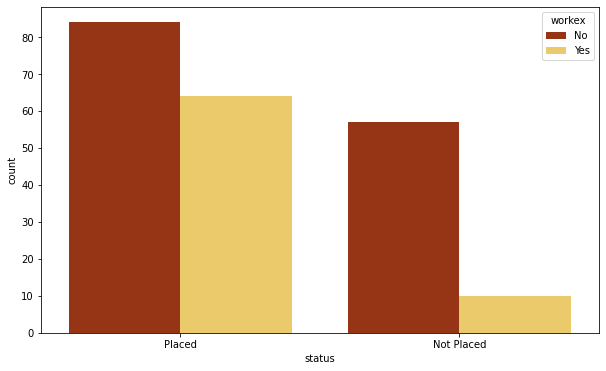

In [9]:
plt.subplots(figsize=(10,6))
sns.countplot(df['status'],hue= df['workex'],palette='afmhot')

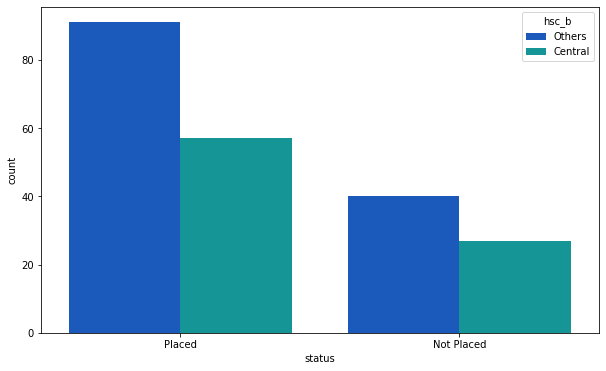

In [10]:
plt.subplots(figsize=(10,6))
sns.countplot(df['status'],hue= df['hsc_b'],palette='winter')

In [11]:
df1 = df[df['salary']!=0]

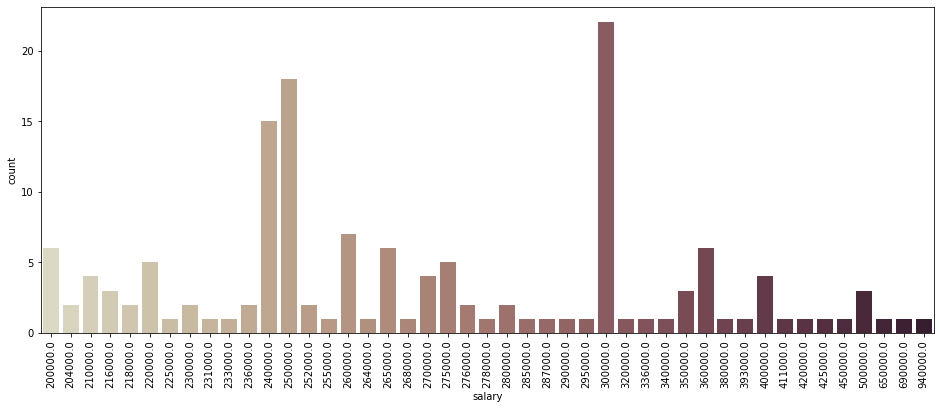

In [12]:
plt.figure(figsize=(16,6)) 
ax= sns.countplot(x='salary', data=df1,palette="ch:.4")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Text(0.5, 0, 'Salary')

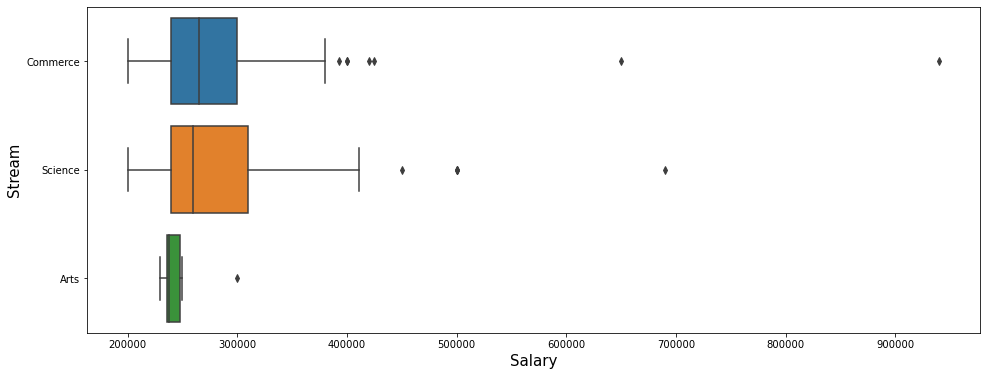

In [13]:
plt.figure(figsize =(16,6))
sns.boxplot("salary", "hsc_s", data=df1)
plt.ylabel('Stream',fontsize=15)
plt.xlabel('Salary',fontsize=15)

Text(0.5, 0, 'Salary')

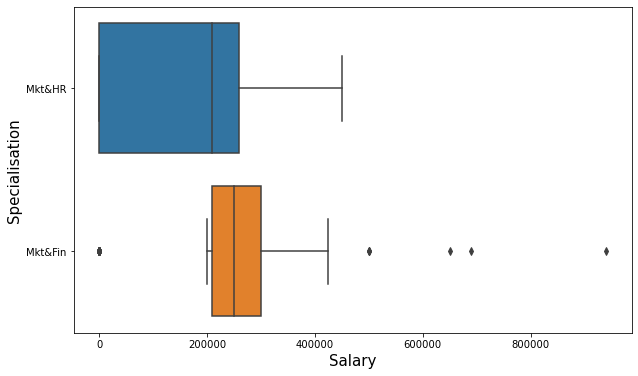

In [14]:
plt.subplots(figsize=(10,6))
sns.boxplot(x = 'salary', y = 'specialisation', data = df)
plt.ylabel('Specialisation',fontsize=15)
plt.xlabel('Salary',fontsize=15)

Text(0.5, 0, 'Selection')

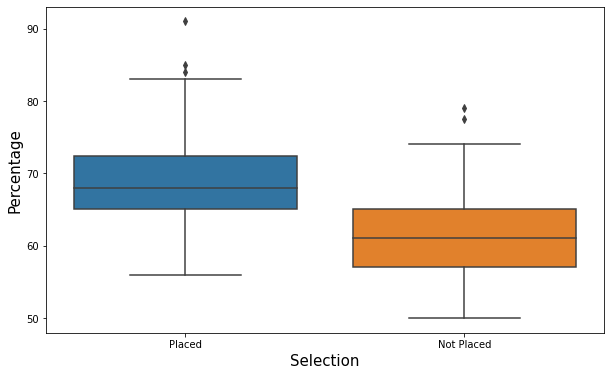

In [15]:
plt.subplots(figsize=(10,6))
sns.boxplot(x = 'status', y = 'degree_p', data = df)
plt.ylabel('Percentage',fontsize=15)
plt.xlabel('Selection',fontsize=15)

In [16]:
categ = df.groupby('degree_t').agg('count')
Label = categ.status.sort_values().index 
Count = categ.status.sort_values()

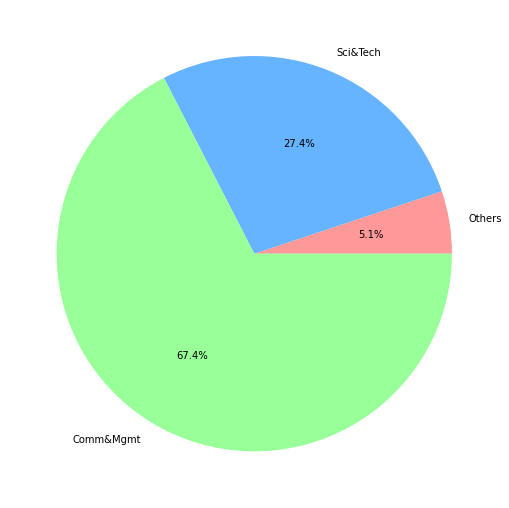

In [17]:
plt.figure(1, figsize=(40,20))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.subplot(GridSpec(2, 2)[0, 1], aspect=1)
type_show_ids = plt.pie(Count, labels=Label, autopct='%1.1f%%', colors=colors)
plt.show()

# Model training and Evaluation

In [18]:
cols = df.columns[df.dtypes == object]
cols

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [19]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

In [20]:
X = df[['gender', 'ssc_p', 'ssc_b','hsc_p','hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p',
        'specialisation', 'mba_p',]]
y = df['status']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2)

In [22]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
print(accuracy_score(y_test,model.predict(X_test)))

0.8604651162790697
